In [1]:
# What is the difference in the cost of living affordability for renters vs. first-time home owners vs. not first-time home owners?

In [2]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [3]:
# Save file path to variable
data_csv = Path('Resources/final_df.csv')

# Read with Pandas
final_df = pd.read_csv(data_csv)

# Display Results
final_df.head(2)

,Unnamed: 0,Year,Location,Number of Households,Tenure,Housing Characteristics
0,292,2021,"Large urban population centres, Ontario",175500,First-time homebuyer,Single-detached house
1,293,2022,"Large urban population centres, Ontario",124600,First-time homebuyer,Single-detached house


In [4]:
# I tried to fix the index and export without the 'Unnamed' column but it didn't work so I'm just deleting the column instead
final_df.drop(columns=['Unnamed: 0'], inplace=True)
final_df.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
0,2021,"Large urban population centres, Ontario",175500,First-time homebuyer,Single-detached house
1,2022,"Large urban population centres, Ontario",124600,First-time homebuyer,Single-detached house


In [5]:
 # Demonstrate calculating measures of central tendency
mean_numpy = np.mean(final_df['Number of Households'])
print(f"The mean number of households is {mean_numpy}")

median_numpy = np.median(final_df['Number of Households'])
print(f"The median number of households is {median_numpy}")

mode_scipy = st.mode(final_df['Number of Households'])
print(f"The mode number of households is {mode_scipy}")

The mean number of households is 63324.242424242424
The median number of households is 15500.0
The mode number of households is ModeResult(mode=0, count=210)


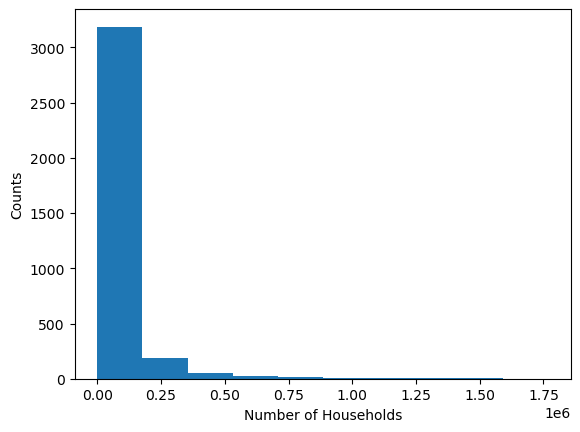

NormaltestResult(statistic=3729.7358639449844, pvalue=0.0)


In [6]:
 # Characterize the data set using matplotlib and stats.normaltest
plt.hist(final_df['Number of Households'])
plt.xlabel('Number of Households')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(final_df['Number of Households'].sample(3498)))

In [7]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(final_df['Number of Households'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(final_df['Number of Households'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 21970982471.19561
The population standard deviation using the NumPy module is 148226.11939599446


In [8]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between -84901.877 and 211550.362
Roughly 95% of the data is between -233127.996 and 359776.481
Roughly 99.7% of the data is between -381354.116 and 508002.601


In [9]:
 # Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(final_df['Number of Households'])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0       0.756788
1       0.413394
2      -0.330740
3      -0.186366
4      -0.010283
          ...   
3493   -0.188389
3494   -0.283514
3495   -0.312524
3496   -0.375266
3497   -0.408998
Name: Number of Households, Length: 3498, dtype: float64


In [10]:
# Define the threshold and filter out rows greater than 3 or less than -3
threshold = 3
filtered_df = final_df[(z_scipy <= threshold) & (z_scipy >= -threshold)]
final_df = filtered_df

# Display results
final_df

,Year,Location,Number of Households,Tenure,Housing Characteristics
0,2021,"Large urban population centres, Ontario",175500,First-time homebuyer,Single-detached house
1,2022,"Large urban population centres, Ontario",124600,First-time homebuyer,Single-detached house
2,2021,"Large urban population centres, Ontario",14300,First-time homebuyer,Semi-detached house
3,2022,"Large urban population centres, Ontario",35700,First-time homebuyer,Semi-detached house
4,2021,"Large urban population centres, Ontario",61800,First-time homebuyer,Row house
...,...,...,...,...,...
3493,2022,Outside census metropolitan areas and census a...,35400,Renter,Neither difficult nor easy to meet financial n...
3494,2021,Outside census metropolitan areas and census a...,21300,Renter,Easy to meet financial needs
3495,2022,Outside census metropolitan areas and census a...,17000,Renter,Easy to meet financial needs
3496,2021,Outside census metropolitan areas and census a...,7700,Renter,Very easy to meet financial needs


In [11]:
# Use loc to seperate 'financial_needs' category
financial_needs = final_df.loc[
    (final_df['Housing Characteristics'].isin([
        'Very easy to meet financial needs', 
        'Very difficult to meet financial needs', 
        'Difficult to meet financial needs',
        'Neither difficult nor easy to meet financial needs',
        'Easy to meet financial needs' 
        ]))]

# Display results
financial_needs.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
2080,2021,"Large urban population centres, Ontario",18300,First-time homebuyer,Very difficult to meet financial needs
2081,2022,"Large urban population centres, Ontario",36700,First-time homebuyer,Very difficult to meet financial needs


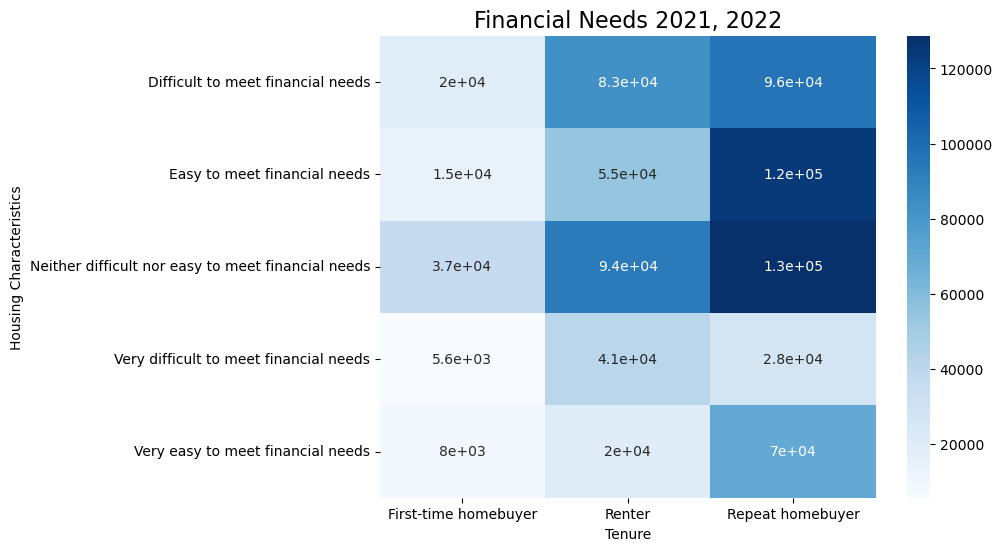

In [12]:
# Prepare data for correlation map 'financial_needs'
pivot_df = financial_needs.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Financial Needs 2021, 2022', fontsize=16)

# Save and show the image
plt.savefig(Path('Resources/financial_needs_correlation.png'))
plt.show()

In [13]:
# Use loc to seperate 'employment' category
employment = final_df.loc[
    (final_df['Housing Characteristics'].isin([
    'Employed',
    'Not employed'
]))]

# Display results
employment.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
2072,2021,"Large urban population centres, Ontario",321600,First-time homebuyer,Employed
2073,2022,"Large urban population centres, Ontario",310000,First-time homebuyer,Employed


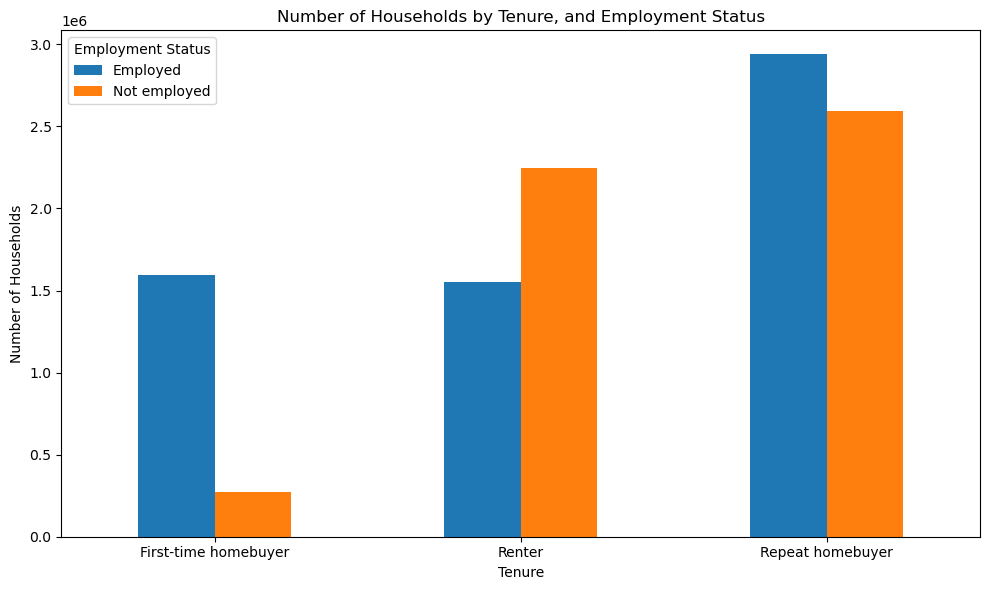

In [30]:
# Prepare data histogram
grouped_employment = employment.groupby(['Tenure', 'Housing Characteristics'])['Number of Households'].sum().unstack()

# Create the histogram
grouped_employment.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Number of Households by Tenure, and Employment Status')
plt.ylabel('Number of Households')
plt.legend(title='Employment Status')
plt.xticks(rotation=0)

# Save and show the image
plt.tight_layout()
plt.savefig(Path('Resources/employment_histogram'))
plt.show()

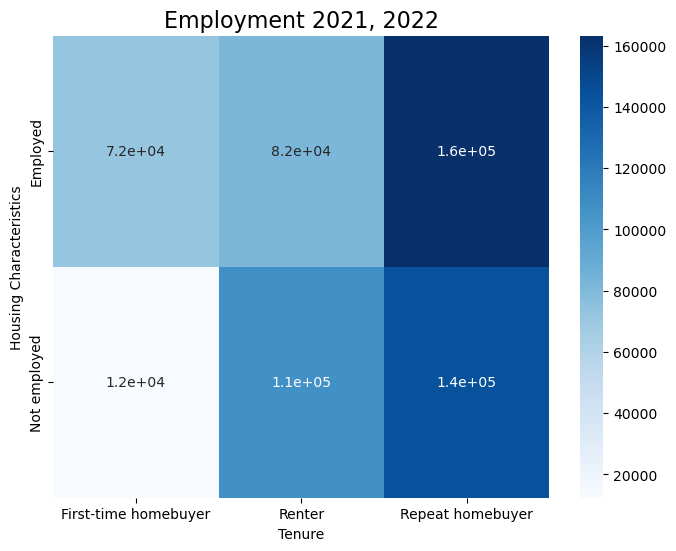

In [15]:
# Prepare data for correlation map 'employment'
pivot_df = employment.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Employment 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [16]:
# Use loc to seperate 'age' category
age = final_df.loc[
    (final_df['Housing Characteristics'].isin([
        '15 to 24 years',
        '25 to 34 years',
        '35 to 44 years',
        '45 to 54 years',
        '55 to 64 years',
        '65 to 74 years',
        '75 years and older' 
        ]))]

# Display results
age

,Year,Location,Number of Households,Tenure,Housing Characteristics
2058,2021,"Large urban population centres, Ontario",18100,First-time homebuyer,15 to 24 years
2059,2022,"Large urban population centres, Ontario",11600,First-time homebuyer,15 to 24 years
2060,2021,"Large urban population centres, Ontario",151800,First-time homebuyer,25 to 34 years
2061,2022,"Large urban population centres, Ontario",159000,First-time homebuyer,25 to 34 years
2062,2021,"Large urban population centres, Ontario",116400,First-time homebuyer,35 to 44 years
...,...,...,...,...,...
3475,2022,Outside census metropolitan areas and census a...,20600,Renter,55 to 64 years
3476,2021,Outside census metropolitan areas and census a...,18700,Renter,65 to 74 years
3477,2022,Outside census metropolitan areas and census a...,22600,Renter,65 to 74 years
3478,2021,Outside census metropolitan areas and census a...,23600,Renter,75 years and older


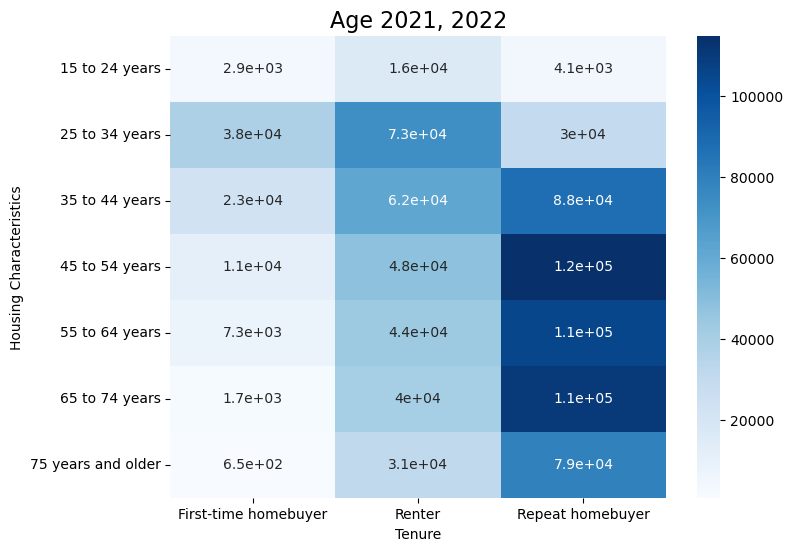

In [17]:
# Prepare data for correlation map 'age'
pivot_df = age.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Age 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [18]:
# Use loc to seperate 'minority' category
minority = final_df.loc[
    (final_df['Housing Characteristics'].isin([
    'Belongs to a visible minority group',
    'Does not belong to a visible minority group'
]))]

# Display results
minority.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
2076,2021,"Large urban population centres, Ontario",215200,First-time homebuyer,Belongs to a visible minority group
2077,2022,"Large urban population centres, Ontario",198400,First-time homebuyer,Belongs to a visible minority group


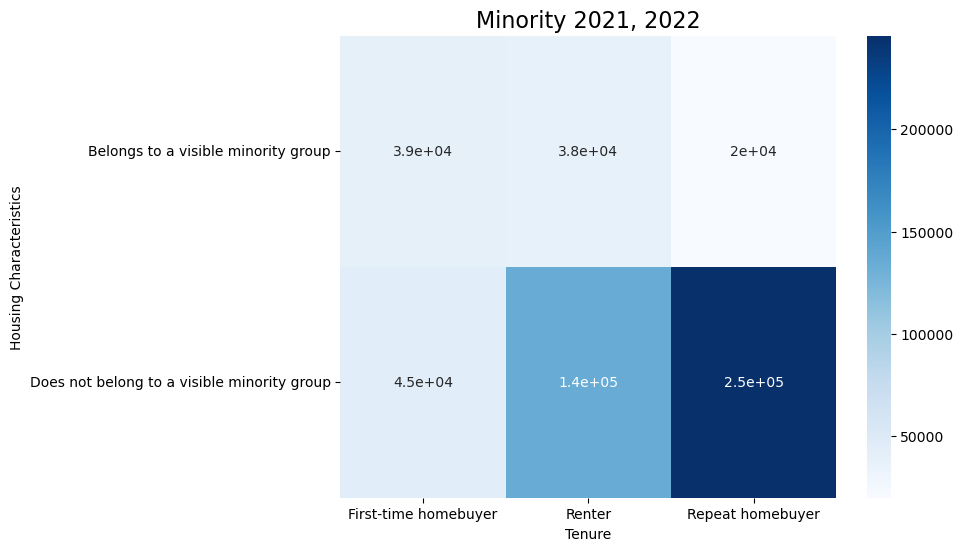

In [19]:
# Prepare data for correlation map 'minority'
pivot_df = minority.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Minority 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [20]:
# Use loc to seperate 'neighbourhood_satifaction' category
neighbourhood_satifaction = final_df.loc[
    (final_df['Housing Characteristics'].isin([
    'Neighbourhood satisfaction rating between 0 and 5',
    'Neighbourhood satisfaction rating of 6 or 7',
    'Neighbourhood satisfaction rating of 8, 9 or 10'
]))]

# Display results
neighbourhood_satifaction.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
26,2021,"Large urban population centres, Ontario",48600,First-time homebuyer,Neighbourhood satisfaction rating between 0 and 5
27,2022,"Large urban population centres, Ontario",53200,First-time homebuyer,Neighbourhood satisfaction rating between 0 and 5


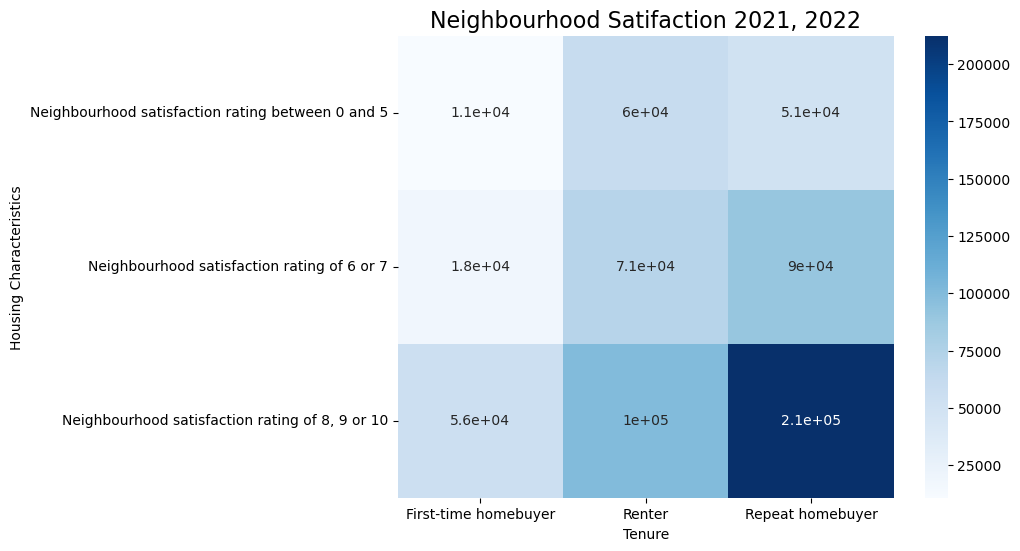

In [21]:
# Prepare data for correlation map 'neighbourhood_satifaction'
pivot_df = neighbourhood_satifaction.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Neighbourhood Satifaction 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [22]:
# Use loc to seperate 'moved' category
moved = final_df.loc[
    (final_df['Housing Characteristics'].isin([
        'Moved because the household was forced to move by a landlord, a bank or other financial institution or the government',
        'Moved due to a natural disaster or fire',
        'Moved for a new job or job transfer',
        'Moved for a new school',
        'Moved to reduce housing costs',
        'Moved to be in a more desirable neighbourhood',
        'Moved for personal health reasons',
        'Moved to become a homeowner',
        'Moved due to issues with previous landlord or other tenants',
        'Moved for another reason', 
        'Moved to upgrade to a larger dwelling or better quality dwelling',
        'Moved to reduce commuting time',
        'Moved because of a change in household or family size',
        'Moved to be closer to family', 
        'Moved to form own household'
]))]

# Display results
moved.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
32,2021,"Large urban population centres, Ontario",8400,First-time homebuyer,Moved because the household was forced to move...
33,2022,"Large urban population centres, Ontario",4100,First-time homebuyer,Moved because the household was forced to move...


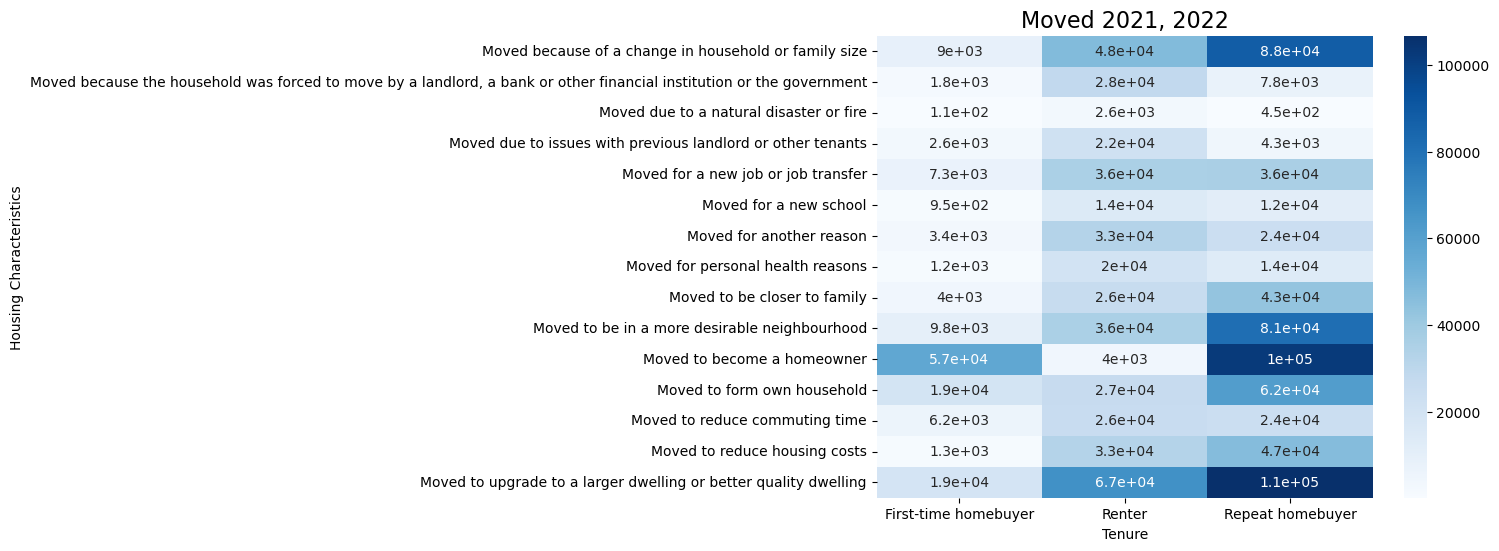

In [23]:
# Prepare data for correlation map 'minority_employment'
pivot_df = moved.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Moved 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [24]:
# Use loc to seperate 'family_dynamic' category
family_dynamic = final_df.loc[
    (final_df['Housing Characteristics'].isin([
        'Other family household',
        'One-family household - couple with children',
        'One-family household - couple without children', 
        'One-family household - one-parent family',
        'One-person household',
        'Two-or-more-person non-family household'
]))]

# Display results
family_dynamic.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
2046,2021,"Large urban population centres, Ontario",113700,First-time homebuyer,One-family household - couple with children
2047,2022,"Large urban population centres, Ontario",99500,First-time homebuyer,One-family household - couple with children


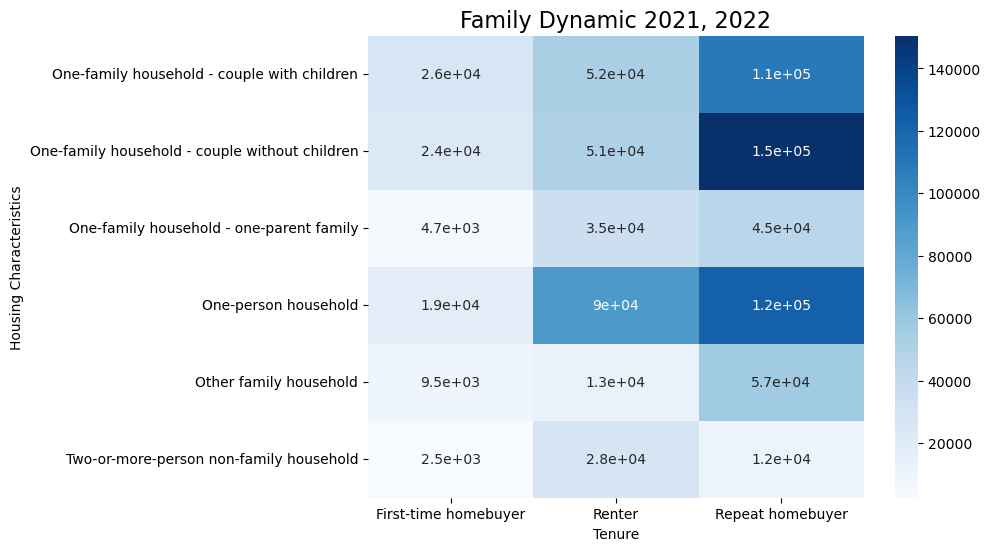

In [25]:
# Prepare data for correlation map 'family_dynamic'
pivot_df = family_dynamic.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Family Dynamic 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [26]:
# Use loc to seperate 'housing_type' category
housing_type = final_df.loc[
    (final_df['Housing Characteristics'].isin([
    'Single-detached house',
    'Semi-detached house',
    'Movable dwelling',
    'Row house',
    'Apartment or flat in a duplex',
    'Apartment in a building that has five or more storeys',
    'Apartment in a building that has fewer than five storeys',
    'Other single-attached house',
    'Condominium',
    'Not condominium'
]))]

# Display results
housing_type.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
0,2021,"Large urban population centres, Ontario",175500,First-time homebuyer,Single-detached house
1,2022,"Large urban population centres, Ontario",124600,First-time homebuyer,Single-detached house


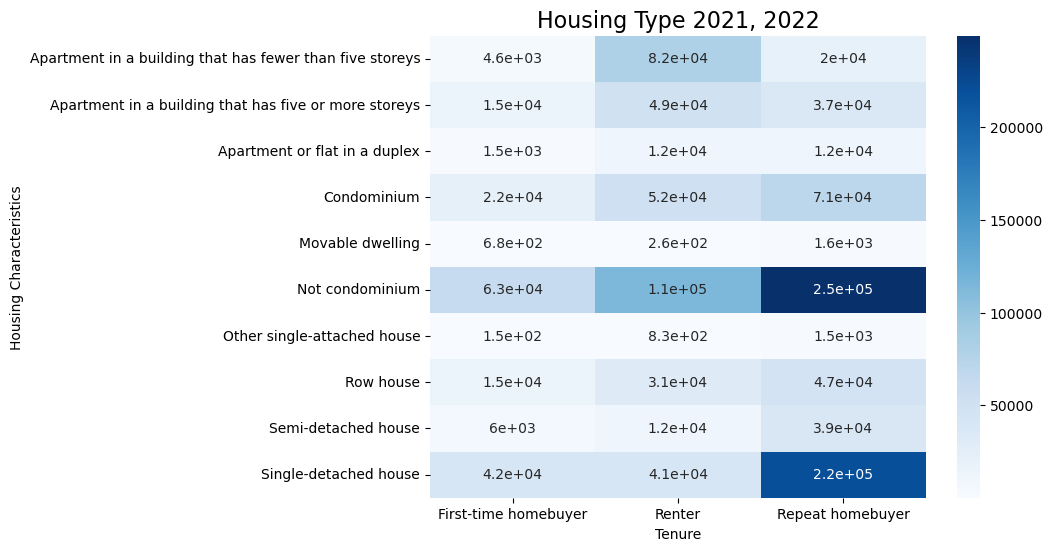

In [27]:
# Prepare data for correlation map 'housing_type'
pivot_df = housing_type.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Housing Type 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()

In [28]:
# Use loc to seperate 'dwelling_satisfaction' category
dwelling_satisfaction = final_df.loc[
    (final_df['Housing Characteristics'].isin([
    'Dwelling satisfaction rating between 0 and 5',
    'Dwelling satisfaction rating of 6 or 7', 
    'Dwelling satisfaction rating of 8, 9 or 10'
]))]

# Display results
dwelling_satisfaction.head(2)

,Year,Location,Number of Households,Tenure,Housing Characteristics
20,2021,"Large urban population centres, Ontario",57800,First-time homebuyer,Dwelling satisfaction rating between 0 and 5
21,2022,"Large urban population centres, Ontario",47700,First-time homebuyer,Dwelling satisfaction rating between 0 and 5


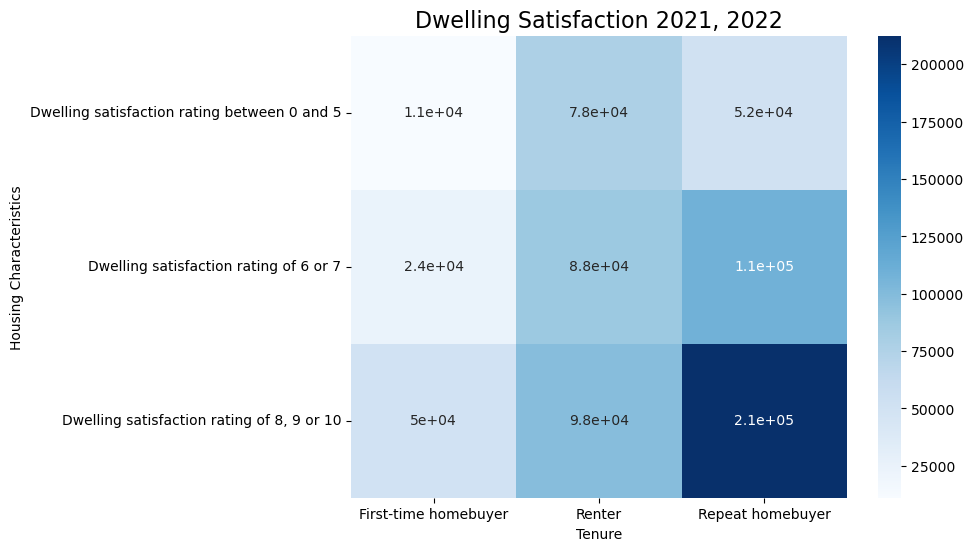

In [29]:
# Prepare data for correlation map 'dwelling_satisfaction'
pivot_df = dwelling_satisfaction.pivot_table(index='Housing Characteristics', columns='Tenure', values='Number of Households')

# Create the correlation map
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues')
plt.title('Dwelling Satisfaction 2021, 2022', fontsize=16)

# Display the correlation map
plt.show()